In [1]:
#modulos

#Class AxiClass

from classy import Class
import numpy as np

##################################

from scipy.optimize import fsolve
from scipy.interpolate import interp1d

################################3

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

In [2]:
# Diccionario de Parametros cosmologicos. e.g LCDM, u otras cosmologias

#parametros cosmológicos misión Planck 2018, restringidos por los espectros TT, TE, EE y 
#además combinados con LowE + lesing, 


#A_s amplitud de fluctuacion escalar



param = {#LCDM 
                   'H0':67.36,
                   'omega_b':0.02237,
                   'omega_cdm': 0.1200,
                   'A_s':2.e-9,
                   'tau_reio': 0.0544}

l_max_scalars = 3000
l_max_tensors = 600

# Note that for l_max_tensors =600 we can keep default precision,   ?
# while for for l_max_tensors = 3000 we would need to import many high precision settings from the file cl_ref.pre ??


#parte solo escalar

cosmo = Class()
cosmo.set(param)

#outputs tCl: Cl de Temperatura, pCl: Cl de polarizacion, lCl : de lensing
#modes: s de scalar... otros t de tensorial 
#n_s = indice espectral escalar  

cosmo.set({'output':'tCl,pCl','modes':'s','lensing':'no','n_s':0.96,
       'l_max_scalars':l_max_scalars})

#Dependiendo de los outputs pedidos, Class llamará a los módulos de CLASS necesarios

#Similar a la rutina de CLASS 'main'con todos los metodos 'struct_init' llamados 

cosmo.compute()

# pedimos calcular los Cl escalares, para esto

Cl_s = cosmo.raw_cl()

Cl_s.keys()             #dictionary 

dict_keys(['tt', 'ee', 'te', 'bb', 'ell'])

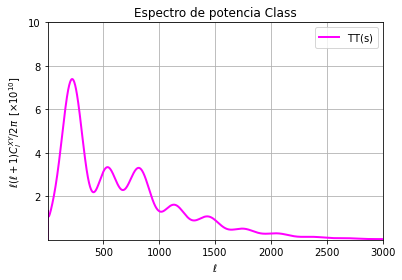

In [3]:
fig, ax = plt.subplots() 

ell = Cl_s['ell']
factor = 1.e10*ell*(ell+1.)/(2*np.pi)


ax.plot(ell, factor*Cl_s['tt'], label= '$\mathrm{TT(s)}$', color='magenta', lw= 2.0)
ax.set_title('Espectro de potencia Class')
ax.set_xlabel('$\ell$')
ax.set_ylabel(r"$\ell (\ell+1) C_l^{XY} / 2 \pi \,\,\, [\times 10^{10}]$" )
ax.set_xlim([2,3000])
ax.set_ylim([1.e-8,10])

ax.legend(loc = 'upper right')
ax.grid()
plt.show()

## AxiClass aprox. fluido

In [34]:
paramf = {# wich output? ClTT, transfer functions delta_i and theta_i
                   'output':'tCl',
                   # LambdaCDM parameters
                   'H0':67.36,
                   'omega_b':0.02237,
                   'omega_cdm': 0.1200,
                   'A_s':2.e-9,
                   'tau_reio': 0.0544,
                   # Take fixed value for primordial Helium (instead of automatic BBN adjustment)
                   #'YHe':0.246,
                    #'N_ur': 2.0328,
                    #'N_ncdm': 1,
                    #'deg_ncdm':1,
                    #'m_ncdm':0.06,
                    #'T_ncdm':0.71611,
    
                    #fluido
                    #'scf_potential': 'axion',
                    #'n_axion':1,
                    'log10_axion_ac': -3.531,
                    'fraction_axion_ac': 0.1,
                    'scf_parameters':1.5,
                    
                    #'scf_parameters':0.0,
    
                    #some EDE parameters
                    #'scf_potential':'axion',
                   #'n_axion': 2.6,
                   #'log10_axion_ac': -3.531,
                   #'fraction_axion_ac': 0.132,
                   #'scf_parameters': 2.72
                   }
                   # other output and precision parameters
                   #'l_max_scalars':3000}

In [35]:
#call CLASS 
#
###############
#
# scalars only
#
cosmof = Class()
cosmof.set(paramf)
cosmof.set({'output':'tCl','modes':'s','lensing':'no','n_s':0.96, 'l_max_scalars':3000})
cosmof.compute()
clf = cosmof.raw_cl(3000)
cosmof.struct_cleanup()
cosmof.empty()

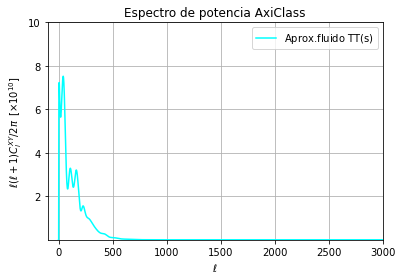

In [37]:
fig, ax = plt.subplots() 

ell = Cl_s['ell']
factor = 1.e10*ell*(ell+1.)/(2*np.pi)


ax.plot(ell, factor*clf['tt'], label= 'Aprox.fluido $\mathrm{TT(s)}$', color='cyan', lw= 1.5)
ax.set_title('Espectro de potencia AxiClass')
ax.set_xlabel('$\ell$')
ax.set_ylabel(r"$\ell (\ell+1) C_l^{XY} / 2 \pi \,\,\, [\times 10^{10}]$" )
ax.set_xlim([-100,3000])
ax.set_ylim([1.e-8,10])

ax.legend(loc = 'upper right')
ax.grid()
plt.show()

## AxiClass Campo dinámico 

In [38]:
paramc = {# wich output? ClTT, transfer functions delta_i and theta_i
                   'output':'tCl',
           
                   # LambdaCDM parameters
                   'H0':67.36,
                   'omega_b':0.02237,
                   'omega_cdm': 0.1200,
                   'A_s':2.e-9,
                   'tau_reio': 0.0544,
                   # Take fixed value for primordial Helium (instead of automatic BBN adjustment)
                   #'YHe':0.246,
                    #'N_ur': 2.0328,
                    #'N_ncdm': 1,
                    #'deg_ncdm':1,
                    #'m_ncdm':0.06,
                    #'T_ncdm':0.71611,
    
                    #fluido
                    #'scf_potential': 'axion',
                    #'n_axion':1,
                    #'log10_axion_ac': -3.531,
                    #'fraction_axion_ac': 0.1,
                    #'scf_parameters':1.5,
                    
                    #'scf_parameters':0.0,
    
                    #some EDE parameters
                    #'scf_potential':'axion',
                   #'n_axion': 2.6,
                   'log10_axion_ac': -3.531,
                   'fraction_axion_ac': 0.132,
                   'scf_parameters': 2.72
                   }
                   # other output and precision parameters
                   #'l_max_scalars':3000}

In [40]:
#call CLASS 
#
###############
#
# scalars only
#
cosmoc = Class()
cosmoc.set(paramc)
cosmoc.set({'output':'tCl','modes':'s','lensing':'no','n_s':0.96,'l_max_scalars':3000})
cosmoc.compute()
clc = cosmoc.raw_cl(3000)
cosmoc.struct_cleanup()
cosmoc.empty()

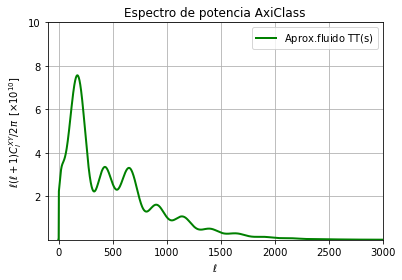

In [41]:
fig, ax = plt.subplots() 

ell = Cl_s['ell']
factor = 1.e10*ell*(ell+1.)/(2*np.pi)


ax.plot(ell, factor*clc['tt'], label= 'Aprox.fluido $\mathrm{TT(s)}$', color='green', lw= 2)
ax.set_title('Espectro de potencia AxiClass')
ax.set_xlabel('$\ell$')
ax.set_ylabel(r"$\ell (\ell+1) C_l^{XY} / 2 \pi \,\,\, [\times 10^{10}]$" )
ax.set_xlim([-100,3000])
ax.set_ylim([1.e-8,10])

ax.legend(loc = 'upper right')
ax.grid()
plt.show()

### Class -  AxiClass

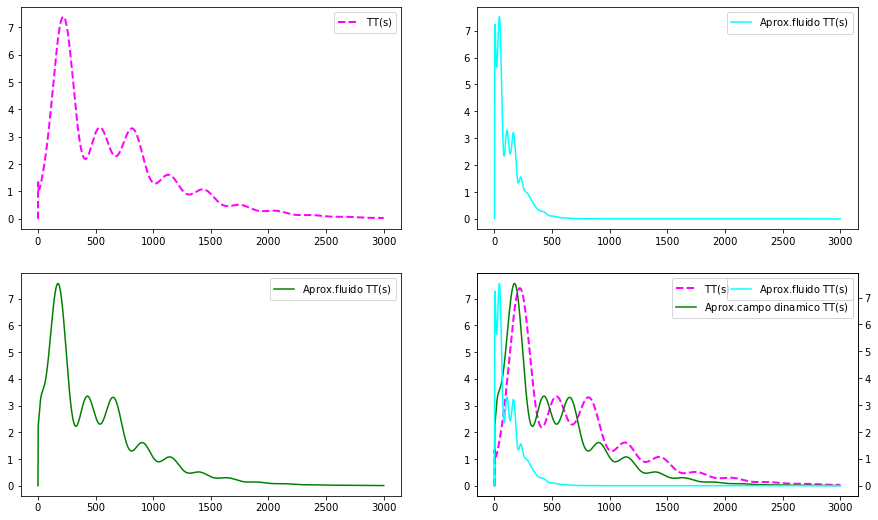

In [42]:
fig, ax = plt.subplots(2,2, figsize = (15,9)) 

factor = 1.e10*ell*(ell+1.)/(2*np.pi)
ell = Cl_s['ell']

#Class
ax[0,0].plot(ell, factor*Cl_s['tt'], '--', color='magenta', lw= 2.0, label= '$\mathrm{TT(s)}$')
ax
ax[0,0].legend()
ax[0,0].grid

#fluido
ax[0,1].plot(ell, factor*clf['tt'], '-', color='cyan', lw= 1.5, label= 'Aprox.fluido $\mathrm{TT(s)}$')
ax[0,1].legend()

#campo dinamico
ax[1,0].plot(ell, factor*clc['tt'] , color='green', lw= 1.5, label= 'Aprox.fluido $\mathrm{TT(s)}$')
ax[1,0].legend()


ax[1,1].plot(ell, factor*Cl_s['tt'], '--', color='magenta', lw= 2.0, label= '$\mathrm{TT(s)}$')
#ax[1,1].legend()



ax[1,1].plot(ell, factor*clc['tt'], label= 'Aprox.campo dinamico $\mathrm{TT(s)}$', color='green', lw= 1.5)

ax[1,1].legend()
ax[1,1] = ax[1,1].twinx()
ax[1,1].plot(ell, factor*clf['tt'], label= 'Aprox.fluido $\mathrm{TT(s)}$', color='cyan', lw= 1.5)
#ax[1,1].semilogx(ell, factor*clc['tt'], label= 'Aprox.campo dinamico $\mathrm{TT(s)}$', color='green', lw= 1.5)
ax[1,1].legend(loc = 'upper right')

ax[1,1].legend()


plt.show()